# EVOLUTION OF THE NBA
## Visualization and Analysis on How the Game Has Changed Over Time
### By: Vrishank Jannu

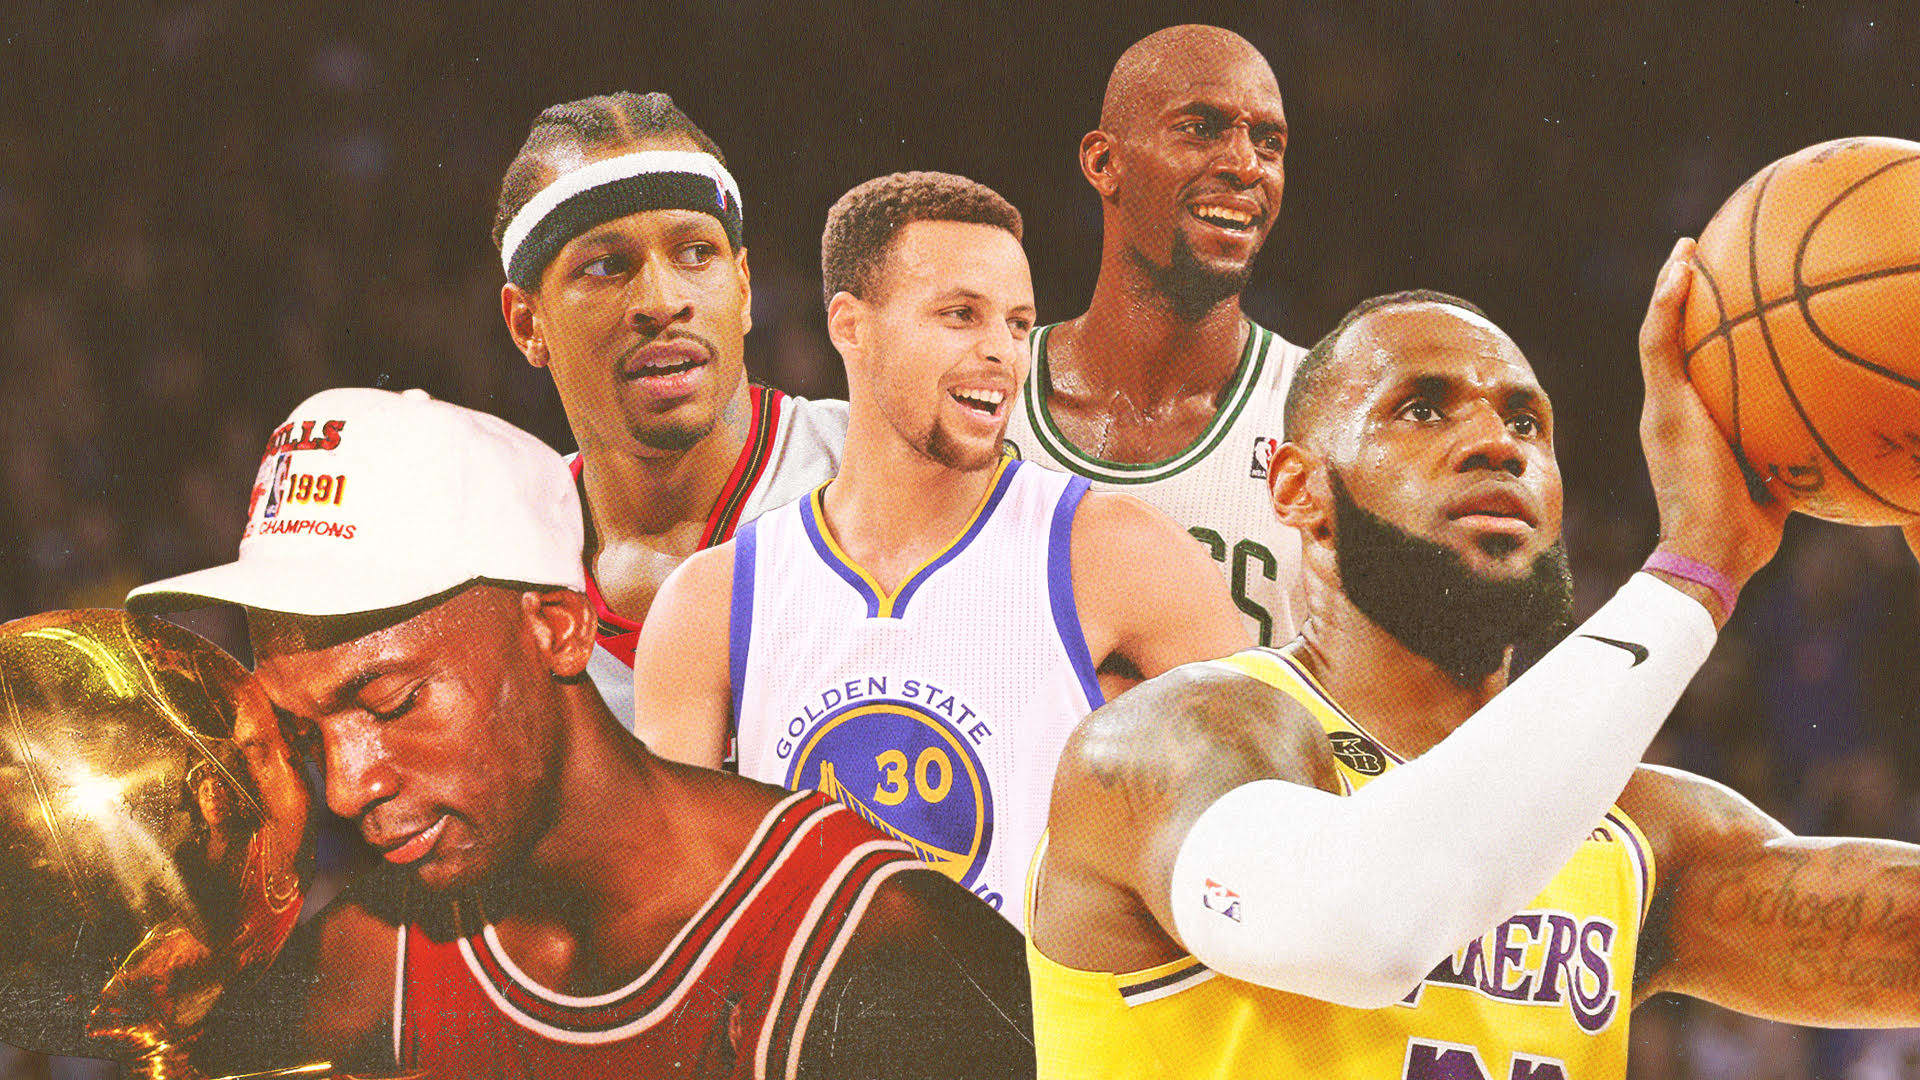

## Goals: 
Visualize and Understand how the League is changing overtime.
1) **Body Composition:** See how the heights and weights of NBA Players are changing and understand how that impacts the game.\
2) **Position:** See how each of the 3 positions (forward, center, guard) are changing in terms of contributions in the game.\
3) **NBA Draft:** Analyze the relationship between draft pick number and overall performance.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
sns.set()
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [16]:
nRowsRead = None
df  = pd.read_csv(r'C:\Users\15128\Downloads\NBAAnalysis\all_seasons.csv')
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns.')

There are 11145 rows and 22 columns.


In [17]:
df.head(10)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
5,5,Eddie Johnson,HOU,38.0,200.66,97.522280,Illinois,USA,1981,2,...,8.2,2.7,1.0,4.1,0.034,0.126,0.220,0.541,0.102,1996-97
6,6,Eddie Jones,LAL,25.0,198.12,86.182480,Temple,USA,1994,1,...,17.2,4.1,3.4,4.1,0.035,0.091,0.209,0.559,0.149,1996-97
7,7,Elden Campbell,LAL,28.0,213.36,113.398000,Clemson,USA,1990,1,...,14.9,8.0,1.6,3.3,0.095,0.183,0.222,0.520,0.087,1996-97
8,8,Eldridge Recasner,ATL,29.0,193.04,86.182480,Washington,USA,1992,Undrafted,...,5.7,1.6,1.3,-0.3,0.036,0.076,0.172,0.539,0.141,1996-97
9,9,Elliot Perry,MIL,28.0,182.88,72.574720,Memphis,USA,1991,2,...,6.9,1.5,3.0,-1.2,0.018,0.081,0.177,0.557,0.262,1996-97


In [18]:
df.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078
std,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000
50%,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000
75%,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000
max,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


Below, we can see that over the course of 24 seasons, there have been just 2235 NBA players to set foot in this league illustrating how competitve it is to make it there in the first place. 

There are currently 30 teams in the NBA, however our data shows 36 which means that there are 6 teams that do not exist today or moved to a different city (e.g. Seattle Supersonics, New Orleans Hornets, Charlotte Bobcats, etc).

In [19]:
categoricals = df.select_dtypes(exclude=[np.number])
categoricals.describe()

,player_name,team_abbreviation,college,country,draft_year,draft_round,draft_number,season
count,11145,11145,11145,11145,11145,11145,11145,11145
unique,2235,36,316,76,45,8,75,24
top,Vince Carter,CLE,None,USA,Undrafted,1,Undrafted,2017-18
freq,22,390,1684,9410,1942,6513,1959,540


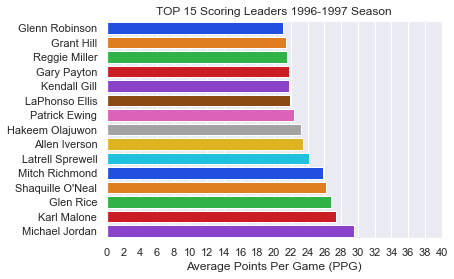

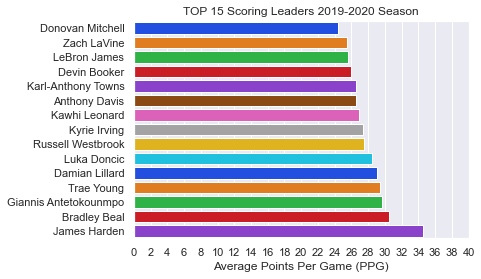

In [20]:
plyr_96_97 =  df[df["season"] == '1996-97']
plyr_96_97 = plyr_96_97.sort_values("pts",ascending = False)
plyr_96_97 = plyr_96_97[:15]

plot2 = sns.barplot(x = "pts", y ="player_name",data = plyr_96_97, order = plyr_96_97.sort_values("pts").player_name, 
            palette = 'bright')
plot2.set_title("TOP 15 Scoring Leaders 1996-1997 Season")
plot2.set_xlabel("Average Points Per Game (PPG)")
plot2.set_ylabel(None)
plot2.set_xlim(0,40)
plot2.set_xticks(range(0,41,2))
plt.show()

plyr_19_20 =  df[df["season"] == '2019-20']
plyr_19_20 = plyr_19_20.sort_values("pts",ascending = False)
plyr_19_20 = plyr_19_20[:15]

plot1 = sns.barplot(x = "pts", y ="player_name",data = plyr_19_20, order = plyr_19_20.sort_values("pts").player_name, 
            palette = 'bright')
plot1.set_title("TOP 15 Scoring Leaders 2019-2020 Season")
plot1.set_xlabel("Average Points Per Game (PPG)")
plot1.set_ylabel(None)
plot1.set_xlim(0,40)
plot1.set_xticks(range(0,41,2))
plt.show()

In [23]:
seasons = list(df['season'].unique())
earliest_season = seasons[0]
latest_season = seasons[-1]

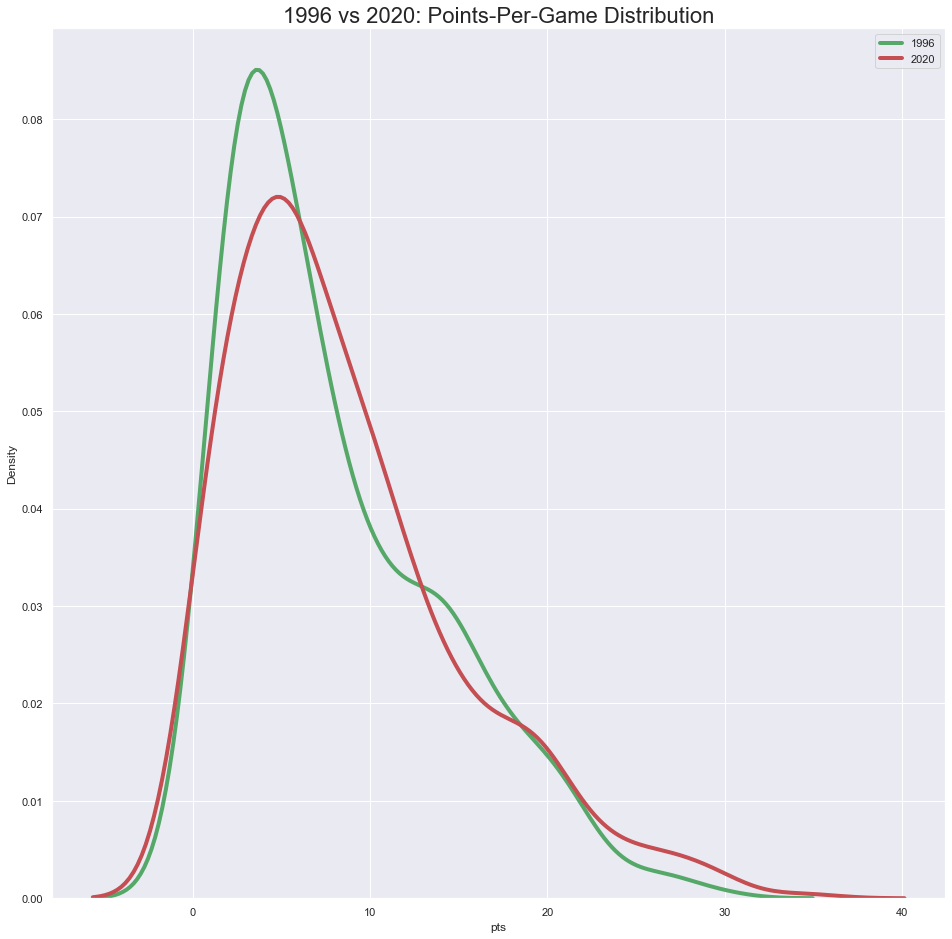

In [28]:
plt.figure(figsize=(16,16))
sns.kdeplot(df[df['season'] == earliest_season]['pts'], color='g', label='1996', linewidth=4)
sns.kdeplot(df[df['season'] == latest_season]['pts'], color='r', label='2020', linewidth= 4)
plt.title("1996 vs 2020: Points-Per-Game Distribution", fontsize=22) 
plt.legend()

Evident from the distribution, it appears that most players nowadays have a higher point-per-game average than players back in 1996. Also, averaging 25+ points per game used to be rare, but nowadays, its nothing new to the NBA enthusiast.

In [8]:
main_variables = df.groupby('player_name', as_index=False).agg({'player_height': 'mean', 'player_weight':'mean'})

## NBA Player Body Composition Changes Analysis:

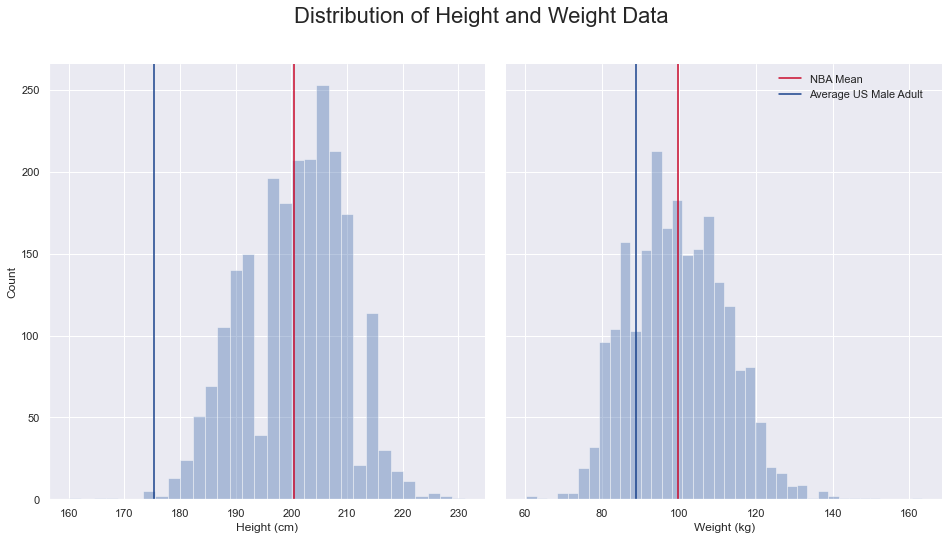

In [9]:
fig, ax = plt.subplots(1,2,figsize=(16, 8),sharey=True)
plt.subplots_adjust(wspace=0.05)

sns.distplot(main_variables ['player_height'], ax=ax[0], label='_nolegend_', kde=False)
sns.distplot(main_variables ['player_weight'], ax=ax[1], label='_nolegend_', kde=False)
ax[0].axvline(main_variables ['player_height'].mean(), color='#c9082a', label='NBA Mean')
ax[1].axvline(main_variables ['player_weight'].mean(), color='#c9082a', label='NBA Mean')

# Add lines for average adults to compare
ax[0].axvline(175.3, color='#17408b', label='Average US Male Adult')
ax[1].axvline(88.8, color='#17408b', label='Average US Male Adult')

ax[0].yaxis.set_label_text('Count')
ax[0].xaxis.set_label_text('Height (cm)')
ax[1].xaxis.set_label_text('Weight (kg)')
plt.suptitle('Distribution of Height and Weight Data', fontsize=22)
plt.legend(loc='upper right', bbox_to_anchor=(0.98, 1.00), frameon=False)
sns.despine(ax=ax[1], left=True)
sns.despine(ax=ax[0])

From the plots above, we can see that Heights and Weights in the NBA are normally distributed but it is clear that NBA athletes stand out height and weight-wise compared to the average US male adult.

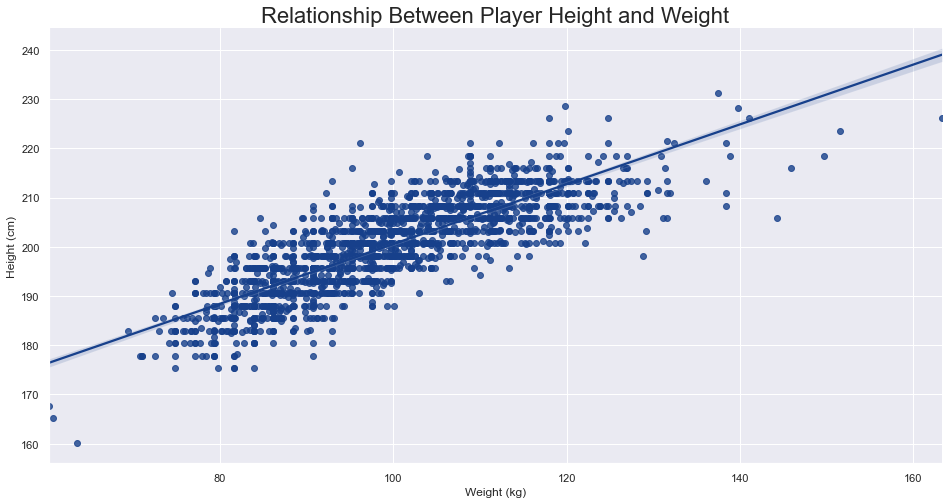

In [10]:
fig = go.Figure(data=go.Scatter(x=main_variables['player_weight'],
                                y=main_variables['player_height'],
                                mode='markers',
                                text=main_variables['player_name'],
                                marker=dict(color='#17408b')
                                ))

fig.update_layout(
    title='NBA Player Height and Weight (for interactive exploration)',
    xaxis_title='Weight (kg)',
    yaxis_title='Height (cm)',
    plot_bgcolor='rgba(0,0,0,0)'
)

plt.figure(figsize=(16, 8))

sns.regplot(x='player_weight', y='player_height', data=main_variables, color='#17408b')

plt.title('Relationship Between Player Height and Weight', fontsize=22)
plt.ylabel('Height (cm)')
plt.xlabel('Weight (kg)')
sns.despine()

plt.show()

In [11]:
corr = stats.pearsonr(main_variables['player_height'], main_variables['player_weight'])
print(f"Correlation between player height and weight is: {corr[0]}.")

Correlation between player height and weight is: 0.828893393177432.


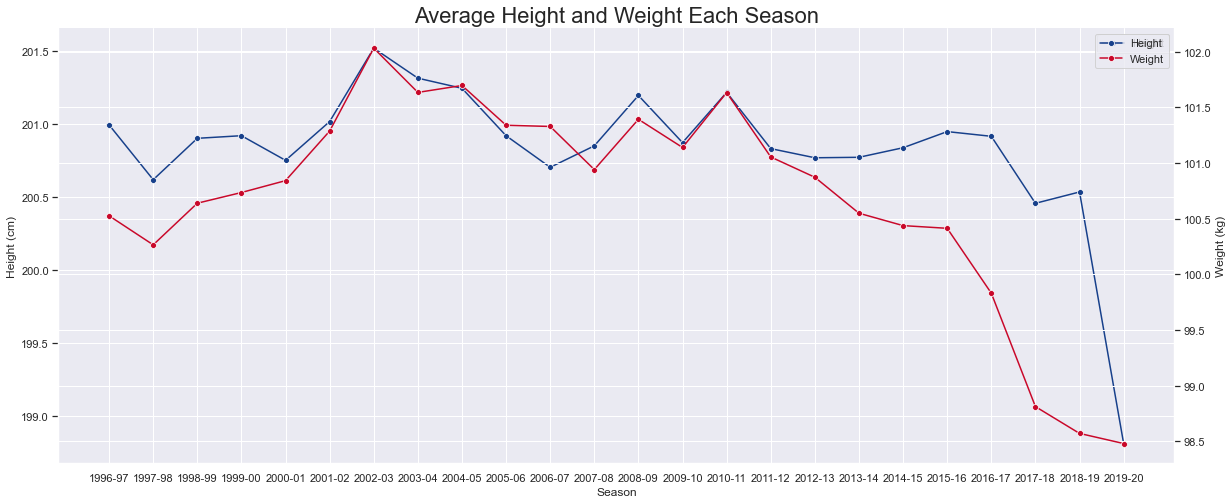

In [12]:
fig, ax = plt.subplots(figsize=(20, 8))
ax2 = ax.twinx()

sns.lineplot(x=df['season'], y='player_height', data=df, marker="o", ax=ax, ci=None, label='Height', color='#17408b')
sns.lineplot(x=df['season'], y='player_weight', data=df, marker="o", ax=ax2, ci=None, label='Weight', color='#c9082a')

plt.title('Average Height and Weight Each Season', fontsize=22)
ax.xaxis.set_label_text('Season')
plt.xticks(rotation=-30)
ax.yaxis.set_label_text('Height (cm)')
ax2.yaxis.set_label_text('Weight (kg)')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show()

However, if we break down the correlation by season, we can see that it is steadily decreasing. This is an early sign of the changing body types of NBA players.


The average NBA player height seems to have gone through a downward trend. The success of small-ball lineups featured by the Golden State Warriors in their famed 73-9 season is a strong driving force for this movement. Perhaps the importance of the three point shot in today's game also contributed to the tendency of teams prioritizing sharpshooters over big men.

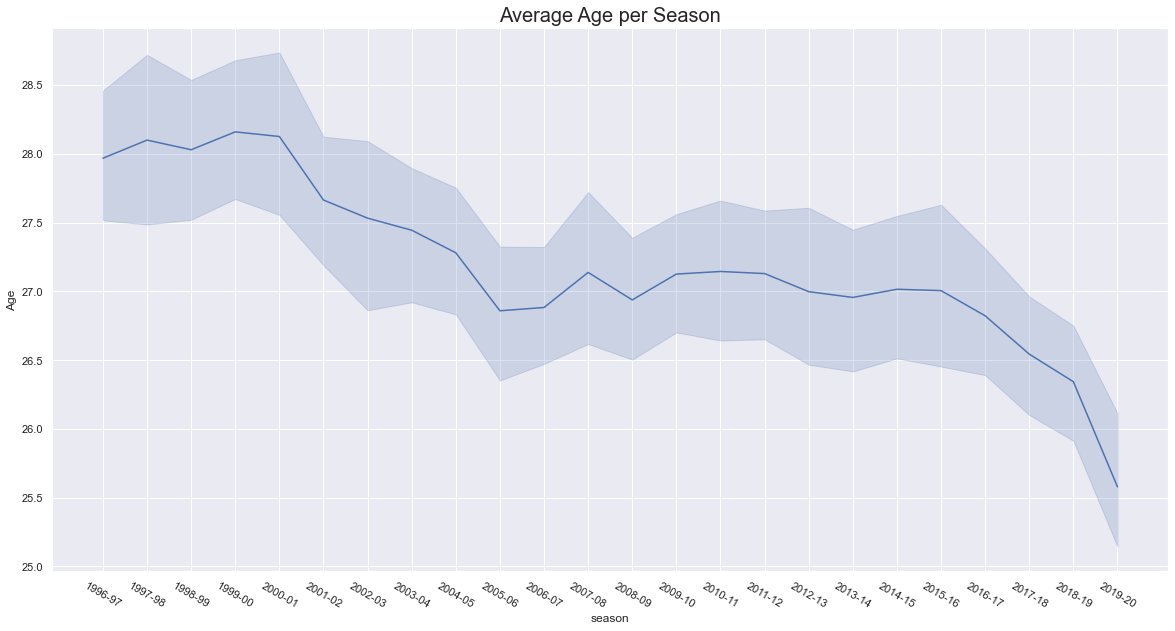

In [13]:
def visualize_average_trend(col):
    team_total_players = pd.DataFrame(df.groupby(['team_abbreviation', 'season'])[col].mean())
    team_total_players = team_total_players.rename({'player_name': f'Average {col}'}, axis=1)
    team_total_players.reset_index().head()
    plt.figure(figsize=(20,10))

    sns.lineplot('season', col, data=team_total_players)
    
    title = (' '.join(col.split('_'))).title()

    plt.xticks(rotation=-30)
    plt.ylabel(title)
    plt.title(f'Average {title} per Season', fontsize=20)
 
    plt.show()
visualize_average_trend('age')

We can see that the average age for an NBA team has gone down by almost 2 years over the past 25 years! It appears that teams are now more likely than ever to in their younger players. The youth is the future!

## NBA Position Changes Analysis:

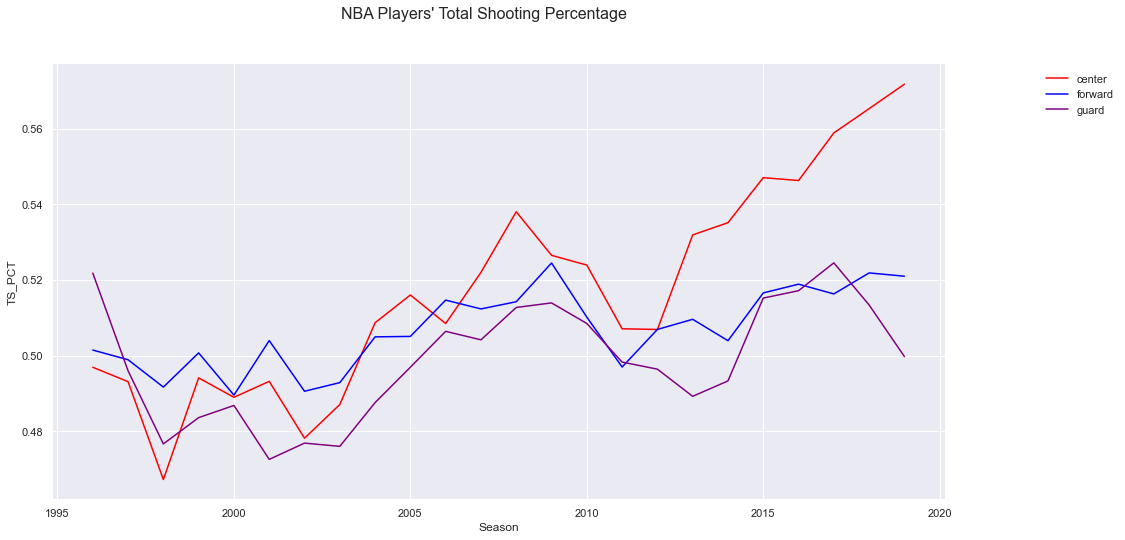

In [14]:
df['position'] = 'NA'
df['position'][df['player_height'] >= 207] = 'Center'
df['position'][df['player_height'] <= 195] = 'Guard'
df['position'][(df.player_height > 195)&(df.player_height < 207 )] = 'Forward'

guard_df = df[df.position == 'Guard']
center_df = df[df.position == 'Center']
forward_df = df[df.position == 'Forward']

ts_center = center_df.groupby("season").mean()["ts_pct"]
ts_forward = forward_df.groupby("season").mean()["ts_pct"]
ts_guard = guard_df.groupby("season").mean()["ts_pct"]

season_list = []
for i in range(1996,2020,1):
    season_list.append(i)

fig, ax = plt.subplots(figsize=(16, 8))
plt.subplots_adjust(wspace=0.05)

sns.lineplot(season_list,ts_center.values, ax=ax, label='center', color = 'red')
sns.lineplot(season_list,ts_forward.values, ax=ax, label='forward', color = 'blue')
sns.lineplot(season_list,ts_guard.values, ax=ax, label='guard', color = 'purple')

ax.yaxis.set_label_text('TS_PCT')
ax.xaxis.set_label_text('Season')
plt.suptitle("NBA Players' Total Shooting Percentage", fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), frameon=False)
sns.despine(ax=ax)

plt.show()

Even though the use of centers is slowly declining, their shooting percentage remains the highest amongst all positions due to majority of their points coming from dunks or high percentage shots in the paint.

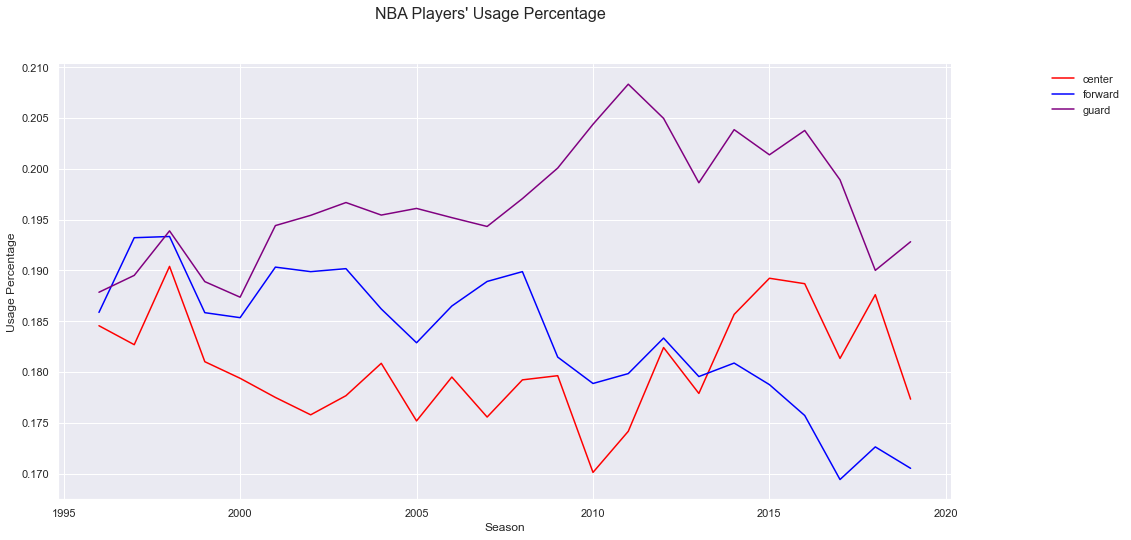

In [15]:
ts_center = center_df.groupby("season").mean()["usg_pct"]
ts_forward = forward_df.groupby("season").mean()["usg_pct"]
ts_guard = guard_df.groupby("season").mean()["usg_pct"]

season_list = []
for i in range(1996,2020,1):
    season_list.append(i)

fig, ax = plt.subplots(figsize=(16, 8))
plt.subplots_adjust(wspace=0.05)

sns.lineplot(season_list,ts_center.values, ax=ax, label='center', color = 'red')
sns.lineplot(season_list,ts_forward.values, ax=ax, label='forward', color = 'blue')
sns.lineplot(season_list,ts_guard.values, ax=ax, label='guard', color = 'purple')

ax.yaxis.set_label_text('Usage Percentage')
ax.xaxis.set_label_text('Season')
plt.suptitle("NBA Players' Usage Percentage", fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), frameon=False)
sns.despine(ax=ax)

plt.show()

We can see that NBA teams are not prefering to play Centers. This shows that the teams want to space out the floor, hence creating more chances to score among all 5 positions. We can see that the guards' usage percentage continues to steadily increase overtime.

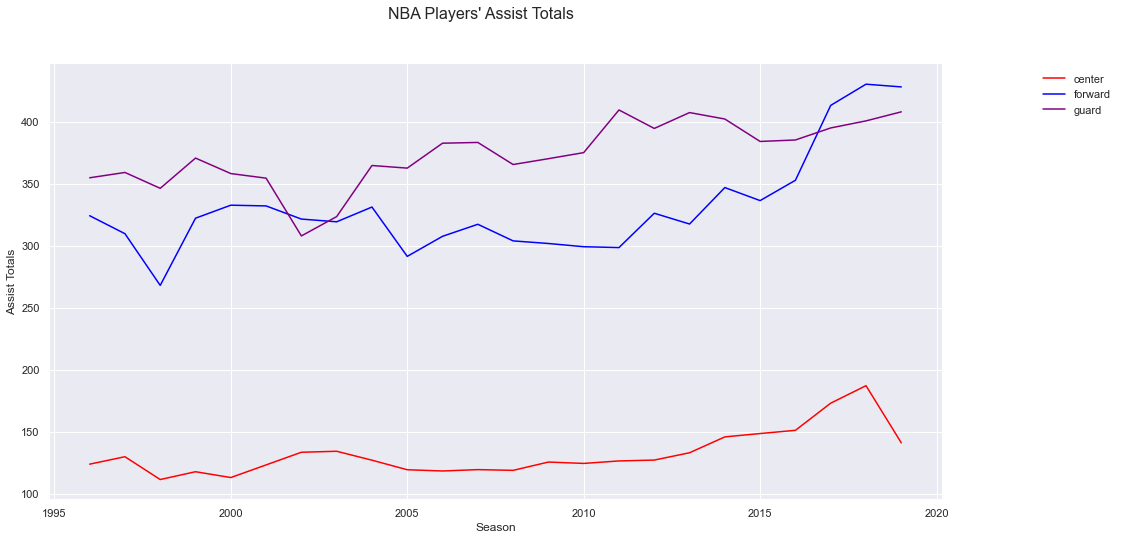

In [16]:
ts_center = center_df.groupby("season").sum()["ast"]
ts_forward = forward_df.groupby("season").sum()["ast"]
ts_guard = guard_df.groupby("season").sum()["ast"]

season_list = []
for i in range(1996,2020,1):
    season_list.append(i)

fig, ax = plt.subplots(figsize=(16, 8))
plt.subplots_adjust(wspace=0.05)

sns.lineplot(season_list,ts_center.values, ax=ax, label='center', color = 'red')
sns.lineplot(season_list,ts_forward.values, ax=ax, label='forward', color = 'blue')
sns.lineplot(season_list,ts_guard.values, ax=ax, label='guard', color = 'purple')

ax.yaxis.set_label_text('Assist Totals')
ax.xaxis.set_label_text('Season')
plt.suptitle("NBA Players' Assist Totals", fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), frameon=False)
sns.despine(ax=ax)

plt.show()

We can see that forwards and guards are becoming more dominant overtime in the assists category.

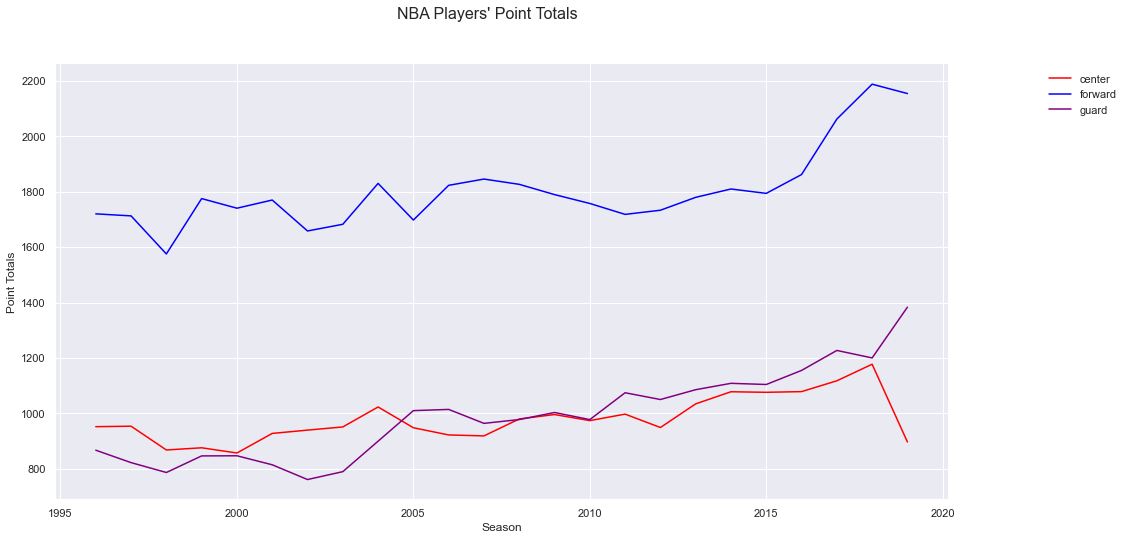

In [17]:
ts_center = center_df.groupby("season").sum()["pts"]
ts_forward = forward_df.groupby("season").sum()["pts"]
ts_guard = guard_df.groupby("season").sum()["pts"]

season_list = []
for i in range(1996,2020,1):
    season_list.append(i)

fig, ax = plt.subplots(figsize=(16, 8))
plt.subplots_adjust(wspace=0.05)

sns.lineplot(season_list,ts_center.values, ax=ax, label='center', color = 'red')
sns.lineplot(season_list,ts_forward.values, ax=ax, label='forward', color = 'blue')
sns.lineplot(season_list,ts_guard.values, ax=ax, label='guard', color = 'purple')

ax.yaxis.set_label_text('Point Totals')
ax.xaxis.set_label_text('Season')
plt.suptitle("NBA Players' Point Totals", fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), frameon=False)
sns.despine(ax=ax)

plt.show()

Forwards have become more dominant in scoring over the years. Guards also appear to be attempting more shots overtime in games which is shown by the rising point totals line.

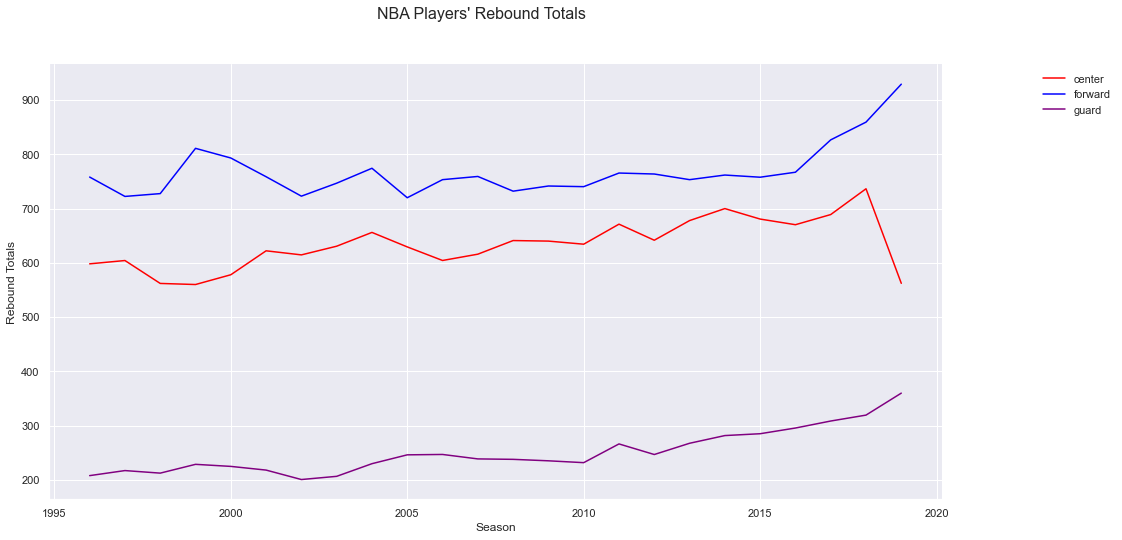

In [18]:
ts_center = center_df.groupby("season").sum()["reb"]
ts_forward = forward_df.groupby("season").sum()["reb"]
ts_guard = guard_df.groupby("season").sum()["reb"]

season_list = []
for i in range(1996,2020,1):
    season_list.append(i)

fig, ax = plt.subplots(figsize=(16, 8))
plt.subplots_adjust(wspace=0.05)

sns.lineplot(season_list,ts_center.values, ax=ax, label='center', color = 'red')
sns.lineplot(season_list,ts_forward.values, ax=ax, label='forward', color = 'blue')
sns.lineplot(season_list,ts_guard.values, ax=ax, label='guard', color = 'purple')

ax.yaxis.set_label_text('Rebound Totals')
ax.xaxis.set_label_text('Season')
plt.suptitle("NBA Players' Rebound Totals", fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), frameon=False)
sns.despine(ax=ax)

plt.show()

Forwards and Guards are becoming more dominant in getting boards and rebounds.

## Insights

1) **NBA is moving towards Small Ball.**

2) **Players are becoming more athletic:** Decreasing weight and height point in that direction.

3) **Guards and Forwards will dominate:** Guards are shooting more and there is an increasing trend in all the statistics for Forwards


## NBA Draft Analysis:

In [3]:
nba = pd.read_csv(r'C:\Users\15128\Downloads\NBAAnalysis\all_seasons.csv')

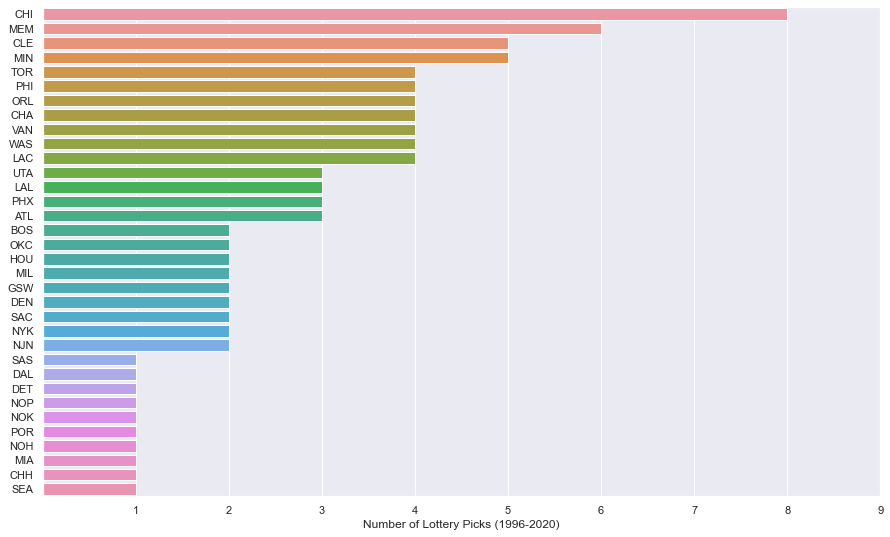

In [5]:
players_draft_year = nba[nba['draft_year'] == nba['season'].apply(lambda x: x[:4])]

lottery_picks = players_draft_year[players_draft_year.draft_number.isin(['1','2','3','4'])]

team_lottery_picks = lottery_picks['team_abbreviation'].value_counts()

plt.figure(figsize=(15,9))

sns.barplot(team_lottery_picks, team_lottery_picks.index)

plt.xlabel('Number of Lottery Picks (1996-2020)')
plt.xticks([i for i in range(1,10)])

plt.show()

In [6]:
#Drop all Players who played a total of < 20 games over their career.
nba_player = nba[['player_name','gp']].groupby('player_name').sum().reset_index()
nba_player = nba_player.loc[nba_player['gp'] < 20]
for player in nba_player['player_name']:
    nba.drop(nba[nba.player_name==player].index, inplace=True)

In [7]:
#Rename 'undrafted' as #61
nba['draft_number'].replace('Undrafted','61',inplace=True)
nba['draft_number'] = pd.to_numeric(nba['draft_number'])

In [8]:
stats = ['gp', 'pts', 'reb', 'ast', 'net_rating','oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']
avg_by_pick = nba.groupby(['draft_number'])[stats].mean().reset_index()
avg_by_player = nba.groupby(['player_name','draft_number'])[stats].mean().reset_index()

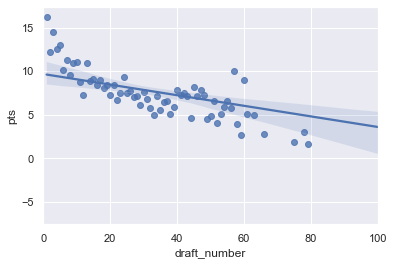

In [9]:
sns.regplot(x='draft_number',y='pts',data=avg_by_pick)
plt.xlim(0,100)
plt.show()

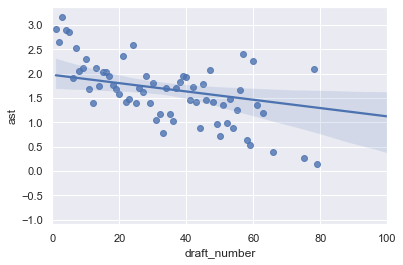

In [10]:
sns.regplot(x='draft_number',y='ast',data=avg_by_pick)
plt.xlim(0,100)
plt.show()

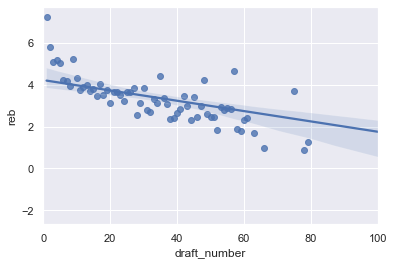

In [11]:
sns.regplot(x='draft_number',y='reb',data=avg_by_pick)
plt.xlim(0,100)
plt.show()

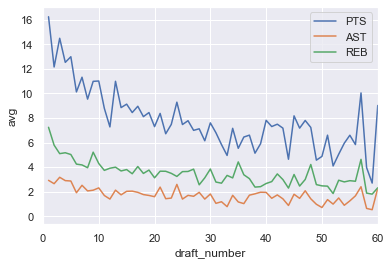

In [12]:
ax = sns.lineplot(x='draft_number',y='pts',data=avg_by_pick, label='PTS')
ax = sns.lineplot(x='draft_number',y='ast',data=avg_by_pick, label='AST')
ax = sns.lineplot(x='draft_number',y='reb',data=avg_by_pick, label='REB')
ax.set(ylabel = 'avg')
plt.xlim(0,60)
ax.legend()
plt.show()

From our regression and line plots, we can clearly see the general trend that earliest pick numbers (first rounders) typically have the best stats and overall performance.